# Analyze Online Video Games sell

#### Project description:

We are working on a project for a online store called Ice that sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 
Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

##### Data description
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

#### Steps to take:
- Step 1: Open the data file and study the general information.
- Step 2: Prepare the data 
    - We will view the data in more detail to convert them to the required types, replace the coluimn names and find missing values.Find and eliminate errors in the data.
- Step 3: Analyze the data 
     - Examine how many games were released in different years. Is the data for every period significant?
     - Examine how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
     - Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
     - Work only with the data that you've decided is relevant. Disregard the data for previous years.
     - Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
     - Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
     - Examine how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
      - Keeping your conclusions in mind, compare the sales of the same games on other platforms.
      - Examine general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?
     - For each region (NA, EU, JP), determine:
     - The top five platforms. Describe variations in their market shares from region to region.
      - The top five genres. Explain the difference.
      - Do ESRB ratings affect sales in individual regions?

- Step 4: Test the hypotheses
   - Average user ratings of the Xbox One and PC platforms are the same.
   - Average user ratings for the Action and Sports genres are different.
   - How you formulated the null and alternative hypotheses
   - What significance level you chose to test the hypotheses, and why
  
#### Goal:
Our goal is to to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.


### Here are the steps followed to complete the project:

## Step 1. Open the data file and study the general information

In [125]:
##### Import default libraries
import pandas as pd # manipulate and wrangle the data  
import numpy as np
import matplotlib.pyplot as plt #2d plotting library which produces publication quality figures in a variety of formats
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative statistical graphics

from scipy import stats # for mathematics, science, and engineering
from math import ceil as math
from scipy import stats as st
#read data from file
df = pd.read_csv('/datasets/games.csv')


In [126]:
##### preview the loaded data
df.info()

# return the top n- rows of dataframe
df.head(100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,3.78,2.17,1.31,0.31,NaN,NaN,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,3.56,2.35,0.98,0.62,97.0,9.1,E
98,Super Mario Bros. 2,NES,1988.0,Platform,5.39,1.18,0.70,0.19,NaN,NaN,NaN


In [127]:
# provides descriptive statistics
display(df.describe()) 

#display all missing values columns along with %

total = df.isnull().sum().sort_values(ascending=False)
percent =total/len(df)*100
pd.concat([total,percent], axis=1, keys=['Total','Percent']).head(8)


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Total,Percent
Critic_Score,8578,51.319174
Rating,6766,40.478612
User_Score,6701,40.089740
Year_of_Release,269,1.609333
Genre,2,0.011965
Name,2,0.011965
Other_sales,0,0.000000
JP_sales,0,0.000000


#### Conclusion:


We checked the general information of 'games' dataset.
Upon checking data, we found that the datasets are much cleaner. We didn't find any big issues and discrepancies. 
However, there are minor issues like
- column names have capital letters (upper and lower case comobination) and need to be changed to lowercase for consistency
-  columns like 'genre','name','platform' need to changed to string  type
-  columns like 'Year_of_Release' need to be integers type

There are missing values in 'Year_of_Release', 'Genre','Critic_Score','User_Score', 'Rating' columns
 

##  Step 2: Prepare the data 
In this step, we are viewing the data in more detail to convert them to the necessary types. Find and eliminate errors in the data 
- Replace the column names (make them lowercase).
- Convert the data to the required types.
- If necessary, decide how to deal with missing values:
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [128]:
# changing the column names to lowercase
df.columns = df.columns.str.lower()

#converting float data numbers into string type
df['genre'] = df['genre'].astype(str)
df['platform'] = df['platform'].astype(str)
df['name'] = df['name'].astype(str)

          
# Drop any duplicates in the database
df.drop_duplicates(inplace=True)

In [129]:
# checking null columns

df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [130]:


# drop any rows that are blank
df.drop(df[df['genre'] == 'nan'].index,inplace=True)
df.drop(df[df['name'] == 'nan'].index,inplace=True)


In [131]:
# imputating 'year_of_release' column 

#df['year_of_release'] = df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform(max))

df['year_of_release'] = df['year_of_release'].fillna(round(df.groupby('name')['year_of_release'].transform('median'),0))

# imputating 'rating' column 
df['rating'] = df['rating'].fillna('unknown')

# imputating 'genre' column 
df['genre'] = df['genre'].fillna('unknown')

# imputating 'user_score' column 
df['user_score'] = df['user_score'].replace('tbd',None)
df['user_score'] = df['user_score'].astype(float)


### Conclusion:
- We changed all the column names to lowercase.
- We converted the datatypes of 'genre', 'year_of release' columns
- We impuated 'year_of_release' column with max of 'year_of_column' grouped by 'name'
- 'critic_score' has 51%, 'user_score' has 41% ,'rating' columns has 41% missing values.
    - 'critic_score' represents the percentage of professional critic reviews that are positive for a given game. There isn't enough information provided for us to know how the critic score is given. So, we think it is not a good idea to assume values for it based on other columns. Since 41% of the column has missing values, it is definitely not a good idea to remove the entire rows either. Hence, we are keeping the missing values as it is for 'critic_score' column
    - 'rating' is ranking or classification based on a comparative assessment of their quality, standard, or performance. As we don't have information on how the rating is calculated, we are not making any assumption by taking the mean, the median value of other columns. Hence, we are keeping these missing values as 'unknown' values.
    - 'user_score' column has also had the same issue. So we are keeping it as it is. However, there is a 'tbd' value which means we are still waiting for a rating. As user perspective is not included in this row of data we can remove this but there are missing values as well. So, we are making 'tbd' values to missing values.


In [132]:
# Drop any duplicates in the database
df.drop_duplicates(inplace=True)

In [133]:
#calculate the total sales for  each game and put these values in a separate column
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
display(df)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


### Conclusion:
We calculated the  total sales (the sum of sales in all regions) for each game and put these values in a separate column 'total_sales'.

After all the cleanup, we also dropped any duplicates records remaining in the dataset.


### Step 3. Analyze the data
- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. - How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

### Games released in different years

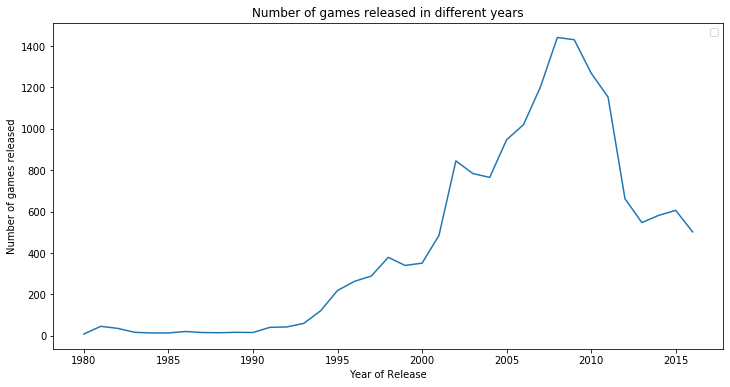

In [134]:
# Find how many games were released in different years. 
# Is the data for every period significant?

games_in_different_yrs = df[['year_of_release','name']].groupby('year_of_release').count().sort_values(by='year_of_release')
#print(games_in_different_yrs)

plt. figure(figsize=(12,6))
sns. lineplot(data=games_in_different_yrs)
plt. title("Number of games released in different years")
plt. xlabel("Year of Release")
plt. ylabel("Number of games released")
plt. legend('')


### Conclusion:
The above plot shows that the gaming era slowly started to rise in 1995 and peaked up by 2010. The highest number of games released was in the year 2008. The game data before 2000 is significantly less than the data after 2000. Its probability because of evolving internet and mobile device technologies.

### Sales varied from platform to platform

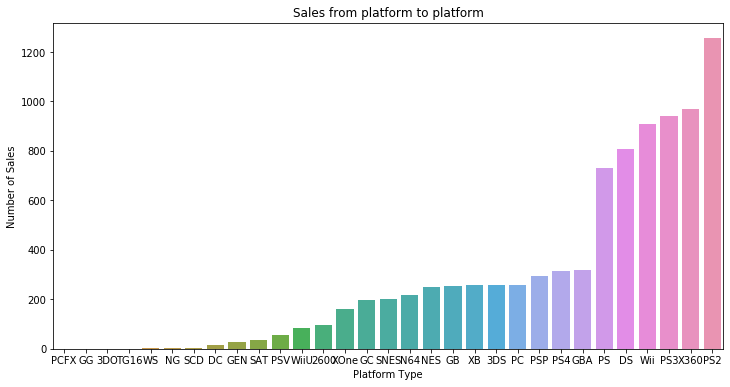

In [135]:
# Choose the platforms with the greatest total sales and 
# Identify platforms with greatest total sales. 

sales_platform = df[['platform','total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
#print(sales_platform)

import seaborn as sns

# Figure Size
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

sns.barplot(x=sales_platform.platform, y='total_sales'
            , data=sales_platform
            , ax=ax
            , capsize=10)

plt.ylabel('Number of Sales')
plt.xlabel('Platform Type')
plt.title('Sales from platform to platform')
          
plt.show()




### Conclusion:
Based on the plot above, we can conclude that PS2, X360, PS3, Wii, DS and PS are the platforms with greatest sales.

### Choose the platforms with the greatest total sales and build a distribution based on data for each year

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


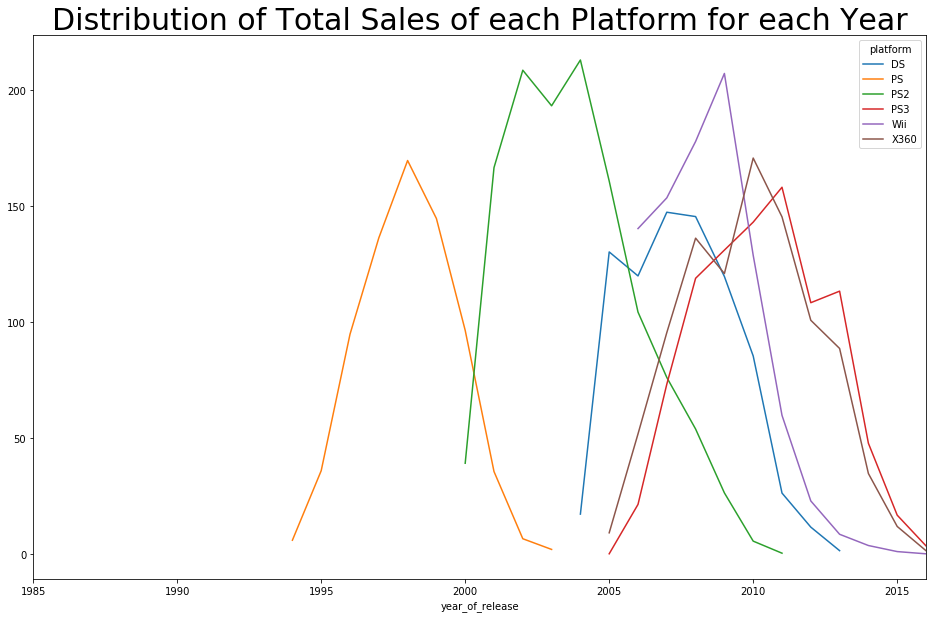

In [136]:
#Choose the platforms with the greatest total sales and 
# build a distribution based on data for each year.

greatest_total_sales_platforms = sales_platform.sort_values(by='total_sales', ascending=False).head(6)['platform'].tolist()
print(greatest_total_sales_platforms)

df_totalsales_platform = df[(df['platform'].isin(greatest_total_sales_platforms) & (df['total_sales']>0))]
#df_totalsales_platform = df_totalsales_platform[df_totalsales_platform['year_of_release']> 1995]

# plot data
fig, ax = plt.subplots(figsize=(16,10))

df_totalsales_platform.groupby(['year_of_release','platform']).sum()['total_sales'].unstack().plot(ax=ax)
plt.title('Distribution of Total Sales of each Platform for each Year', fontsize=30)

plt.show()

### Conclusion:
The platforms that have greatest total sales are the PS2, X360, PS3, Wii, DS and PS (top 6 platforms).The plot above shows the distribution of total sales per platform per year.

### Platforms that used to be popular but now have zero sales. 



In [137]:
# Find platforms that used to be popular but now have zero sales. 

df_2016 = df[df['year_of_release'] == 2016]['platform'].unique()

df_platform = df[(df['total_sales'] >= 0) & ~df['platform'].isin(df_2016)]

print(df_platform['platform'].unique())

['NES' 'GB' 'DS' 'PS2' 'SNES' 'GBA' 'N64' 'PS' 'XB' '2600' 'PSP' 'GC'
 'GEN' 'DC' 'SAT' 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


### Conclusion:
For this, we assumed that our 'now' time period is 2016 and any platform that has sales greater than zero, are the popular platforms. They are NES' 'GB' 'DS' 'PS2' 'SNES' 'GBA' 'N64' 'PS' 'XB' '2600' 'PSP' 'GC' 'GEN' 'DC' 'SAT' 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'

### How long does it generally take for new platforms to appear and old ones to fade?

In [138]:
lowest_totalsales = pd.pivot_table(df, values=['total_sales'],index=['platform','year_of_release'],aggfunc='sum').reset_index()
#print(lowest_totalsales)

lowest_totalsales_perplatform = (lowest_totalsales.groupby('platform')['year_of_release'].max() - lowest_totalsales.groupby('platform')['year_of_release'].min()).reset_index()
average_fade_time = lowest_totalsales_perplatform['year_of_release'].mean().round(decimals=1)

print(average_fade_time)

8.4


#### The average time it takes for new platforms to appear and old ones to fade is about 8.4 years.

### Determine what period to take data for


In [139]:
# Work only with the data that you've decided is relevant. 

data = df[df.year_of_release >= 2013]

#data = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2014)]

#data = df[df['year_of_release'] >= 2008]
#data = data.reset_index(drop=True, inplace=False)
#new_data = pd.pivot_table(data, index='year_of_release', columns= 'platform', values='total_sales', aggfunc=sum, fill_value=0)
#new_data


We should keep data with 'year_of release' greater than 2013.

In [120]:
#check popular platforms
popular_2016=df.query('year_of_release>= 2016').groupby('platform')\
                                                .agg({'total_sales': 'sum'})\
                                                .sort_values(by='total_sales',ascending=False)\
                                                .reset_index()
display(popular_2016)

,platform,total_sales
0,PS4,69.25
1,XOne,26.15
2,3DS,15.14
3,PC,5.25
4,WiiU,4.60
5,PSV,4.25
6,PS3,3.60
7,X360,1.52
8,Wii,0.18


In [51]:
#check year of release of ps4
ps4_year = df.query('platform== "PS4"').agg({'year_of_release': 'min'})
print(ps4_year)

year_of_release    2013.0
dtype: float64


### Determine leading platforms in sales

   platform  total_sales
0        DS         1.54
1       PSP         3.74
2       Wii        13.66
3       PSV        32.99
4        PC        40.06
5      WiiU        64.63
6      X360       136.80
7       3DS       143.25
8      XOne       159.32
9       PS3       181.43
10      PS4       314.14


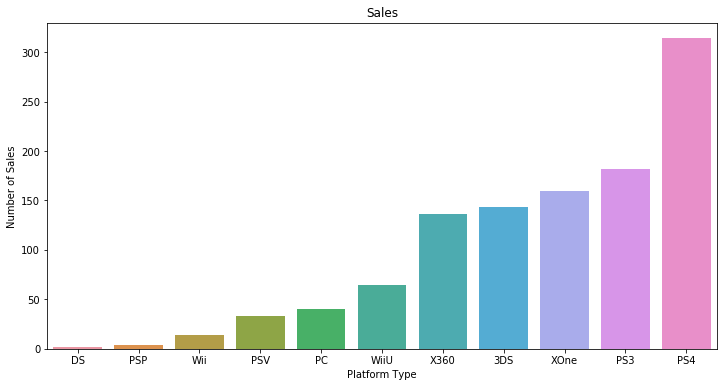

In [140]:
# Which platforms are leading in sales? 

leading_platform = data[['platform','total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
print(leading_platform)
leading_platform = leading_platform[leading_platform['total_sales'] > 1]

# Figure Size
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

sns.barplot(x=leading_platform.platform, y='total_sales'
            , data=leading_platform
            , ax=ax
            , capsize=10)

plt.ylabel('Number of Sales')
plt.xlabel('Platform Type')
plt.title('Sales')
          
plt.show()

#### Conclusion:
Based on plotting above, PS4,PS3, XOne, 3DS and X360 are the platforms that are leading in sales.

### Determine the ones that are growing or shrinking

Text(0, 0.5, 'total_sales')

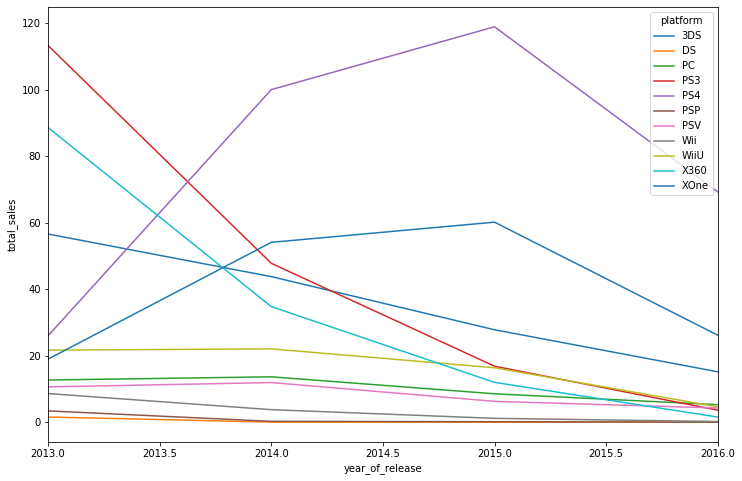

In [141]:
# Which ones are growing or shrinking? Select several potentially profitable platforms.
grow_or_shrink = data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

grow_or_shrink.plot(figsize = (12, 8))
plt.ylabel('total_sales')


### Conclusion:
From the line plotting above, we can conclude that the growing platforms are PS4, XOne and 3DS and the shrinking ones are PSV, DS, Wii and PS2. 


### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

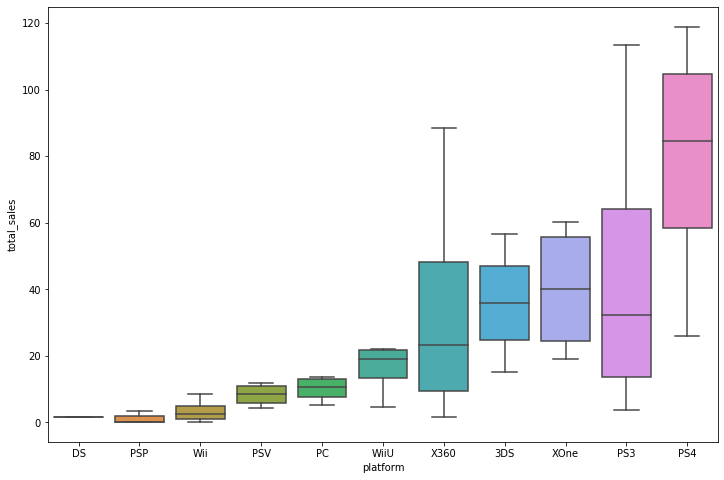

In [142]:
all_games = data.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
order = data.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
plt.figure(figsize=(12,8))
sns.boxplot(x='platform',y='total_sales',data=all_games, order=order)
  

### Conclusion:
Above plot is the global sales of games broken down by platform. The difference in sales are significant. The game sold on PS4, XOne,3DS,PS3 and X360 platforms have higher sales and are profitable ones.
Based on average sale greater than 2013, PS4, XOne, 3DS, PS3 are the most popular ones. Rest are least popular as they have lowest average sales.



### Examine user and professional reviews affect sales for one popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Correlation between user score and total sales for PS4 is: -0.03
Correlation between critical and total sales for PS4 is: 0.41


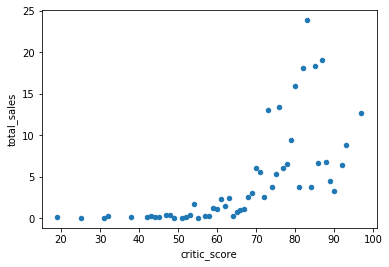

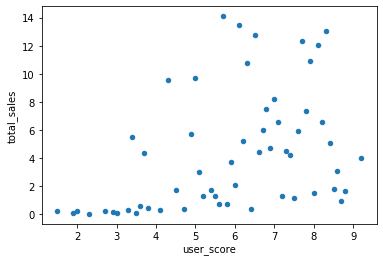

In [143]:
# Take a look at how user and professional reviews affect sales for one popular platform (you choose). 

#X360_data = data[data['platform'] == 'X360']
PS4_data = data[data['platform'] == 'PS4']

# Build a scatter plot and calculate the correlation between reviews and sales.
#Draw conclusions.

PS4_data_critic = PS4_data.groupby(['critic_score'])['total_sales'].sum().reset_index()
PS4_data_critic.plot.scatter(x='critic_score', y='total_sales')

PS4_data_user = PS4_data.groupby(['user_score'])['total_sales'].sum().reset_index()
PS4_data_user.plot.scatter(x='user_score', y='total_sales')

critic_correlation = PS4_data['critic_score'].corr(PS4_data['total_sales'])
user_correlation = PS4_data['user_score'].corr(PS4_data['total_sales'])

print('Correlation between user score and total sales for PS4 is: ' + str(user_correlation.round(decimals=2)))
print('Correlation between critical and total sales for PS4 is: ' + str(critic_correlation.round(decimals=2)))

#### Conclusion:
We chose the PS4 as a popular platform to examine how critic scores and user scores affect its total sales. Based on the plot above, we can conclude that both critic score and user score affect the total sales, as higher the scores given to the game on the platform are, the higher total sales are as well.

The user score correlation value (-0.03) is less than the critic score correlation value (0.4). Gamers seem to rely on critic scores more.

### Compare the sales of the same games on other platforms

In [144]:
# Compare the sales of the same games on other platforms.
PS4_games = PS4_data['name'].unique().tolist()

# Choosing Wii,PS3,X360 platforms to compare sales
samegames_on_otherplatforms = data[(data['platform'] != 'PS4') & data['name'].isin(PS4_games)]
samegames_on_otherplatforms =samegames_on_otherplatforms[samegames_on_otherplatforms['platform'].isin(['XOne', 'PS3', 'X360' ,'Wii', '3DS'])]

critic_correlation = samegames_on_otherplatforms['critic_score'].corr(samegames_on_otherplatforms['total_sales'])
print('Average correlation between critic score and total sales (for XOne, PS3, X360, Wii, 3DS) is ' + str(critic_correlation.round(decimals=2)))

user_correlation = samegames_on_otherplatforms['user_score'].corr(samegames_on_otherplatforms['total_sales'])
print('Average correlation between user score and total sales (for XOne, PS3, X360, Wii, 3DS) is ' + str(user_correlation.round(decimals=2)))

#['XOne', 'PS3', 'X360' ,'Wii', '3DS']

Average correlation between critic score and total sales (for XOne, PS3, X360, Wii, 3DS) is 0.34
Average correlation between user score and total sales (for XOne, PS3, X360, Wii, 3DS) is -0.05


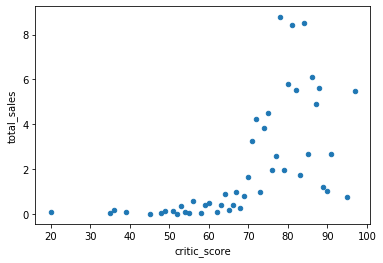

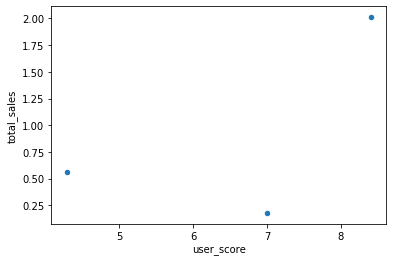

In [145]:
# XOne
samegames_on_otherplatforms_forXOne = samegames_on_otherplatforms[(samegames_on_otherplatforms['platform'] == 'XOne')]
samegames_on_otherplatforms_critic_forXOne = samegames_on_otherplatforms_forXOne.groupby(['critic_score'])['total_sales'].sum().reset_index()

samegames_on_otherplatforms_critic_forXOne.plot.scatter(x='critic_score', y='total_sales')

samegames_on_otherplatforms_user_forXOne = samegames_on_otherplatforms_forWii.groupby(['user_score'])['total_sales'].sum().reset_index()
samegames_on_otherplatforms_user_forXOne.plot.scatter(x='user_score', y='total_sales')


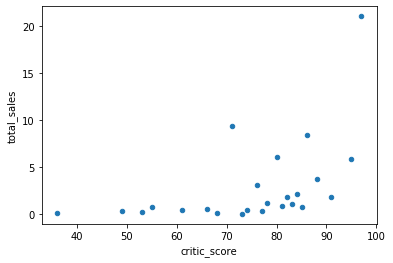

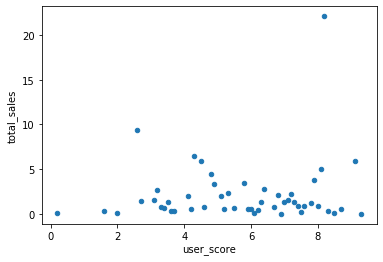

In [146]:
# PS3
samegames_on_otherplatforms_forPS3 = samegames_on_otherplatforms[(samegames_on_otherplatforms['platform'] == 'PS3')]

samegames_on_otherplatforms_critic_forPS3 = samegames_on_otherplatforms_forPS3.groupby(['critic_score'])['total_sales'].sum().reset_index()
samegames_on_otherplatforms_critic_forPS3.plot.scatter(x='critic_score', y='total_sales')

samegames_on_otherplatforms_user_forPS3 = samegames_on_otherplatforms_forPS3.groupby(['user_score'])['total_sales'].sum().reset_index()
samegames_on_otherplatforms_user_forPS3.plot.scatter(x='user_score', y='total_sales')

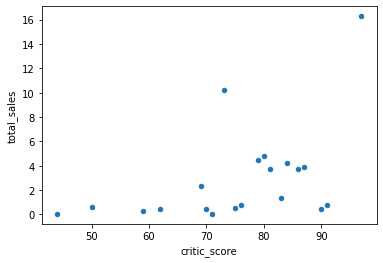

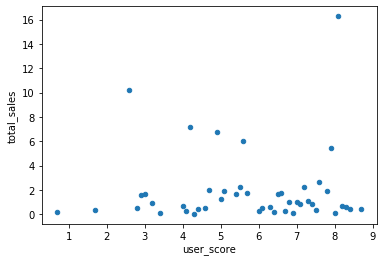

In [147]:
# X360
samegames_on_otherplatforms_forX360 = samegames_on_otherplatforms[(samegames_on_otherplatforms['platform'] == 'X360')]

samegames_on_otherplatforms_critic_forX360 = samegames_on_otherplatforms_forX360.groupby(['critic_score'])['total_sales'].sum().reset_index()
samegames_on_otherplatforms_critic_forX360.plot.scatter(x='critic_score', y='total_sales')

samegames_on_otherplatforms_user_forX360 = samegames_on_otherplatforms_forX360.groupby(['user_score'])['total_sales'].sum().reset_index()
samegames_on_otherplatforms_user_forX360.plot.scatter(x='user_score', y='total_sales')

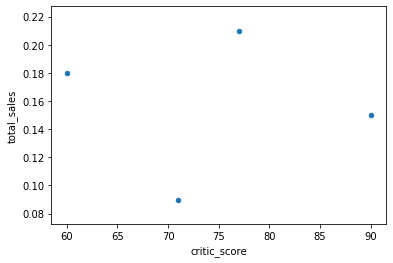

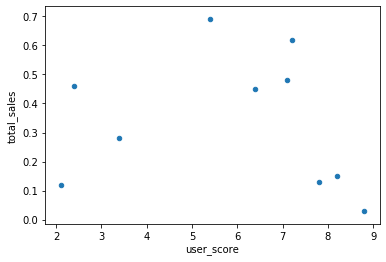

In [100]:
# 3DS
samegames_on_otherplatforms_for3DS = samegames_on_otherplatforms[(samegames_on_otherplatforms['platform'] == '3DS')]

samegames_on_otherplatforms_critic_for3DS = samegames_on_otherplatforms_for3DS.groupby(['critic_score'])['total_sales'].sum().reset_index()
samegames_on_otherplatforms_critic_for3DS.plot.scatter(x='critic_score', y='total_sales')

samegames_on_otherplatforms_user_for3DS = samegames_on_otherplatforms_for3DS.groupby(['user_score'])['total_sales'].sum().reset_index()
samegames_on_otherplatforms_user_for3DS.plot.scatter(x='user_score', y='total_sales')

### Conclusion: 
We chose Wii,PS3, X360, XOne,3DS popular platforms to compare how critic scores and user scores affect its total sales.Based on the plotting above, we can conclude that critic score and user score affect the total sales. We can see as the scores go higher, the sales also go up. 
Average correlation between critic score and total sales (for Wii,PS3, X360, XOne,3DS) is 0.34
Average correlation between user score and total sales (for Wii,PS3, X360, XOne,3DS) is -0.05
However, the correlation numbers don't suppport much that the critic scores and user scores affect its total sales. It's probability because we have less data to support our evidence. 

### General distribution of games by genre. 

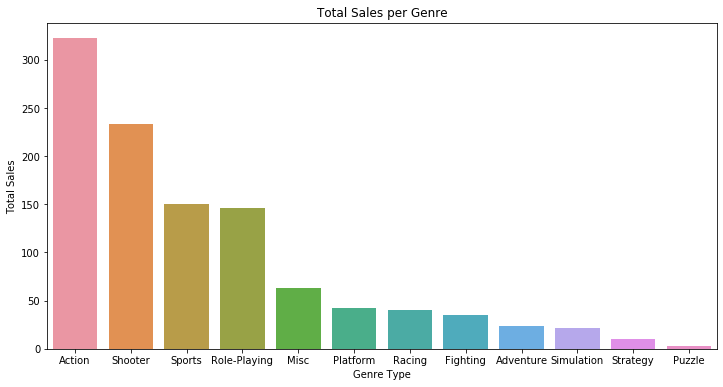

In [148]:
# Take a look at the general distribution of games by genre. 
# What can we say about the most profitable genres?
# Can you generalize about genres with high and low sales?

genre_bygame =data[['genre','total_sales']].groupby(['genre']).sum().sort_values(by='total_sales',ascending=False).reset_index()

# Figure Size
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

sns.barplot(x=genre_bygame.genre, y='total_sales'
            , data=genre_bygame
            , ax=ax
            , capsize=10)

plt.ylabel('Total Sales')
plt.xlabel('Genre Type')
plt.title('Total Sales per Genre')
          
plt.show()



### Conclusion:
Based on the plotting above, we can conclude that the most profitable genre are action , sports , shooter  and role-playing .
Genres with higher sales are action, sports, shooter whereas strategy, puzzle, adventure and flighting are much lower selling genres.

### Step 4. Create a user profile for each region
For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

###  Examine the top 5 platforms per region (NA, EU, JP)

Text(0.5, 1.0, 'Top five platforms per EU region')

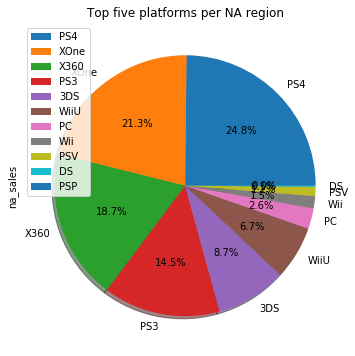

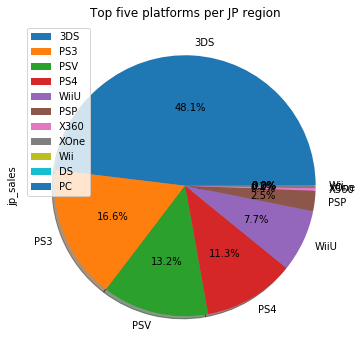

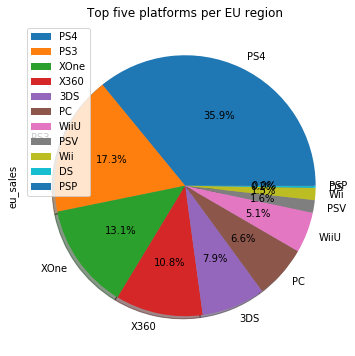

In [149]:
# For each region (NA, EU, JP), determine: The top five genres. 
#Explain the difference.

profile_NA = data[['platform','genre','rating','na_sales']]
profile_JP = data[['platform','genre','rating','jp_sales']]
profile_EU =  data[['platform','genre','rating','eu_sales']]

platform_NA = profile_NA.groupby('platform').sum().sort_values(by='na_sales',ascending=False)
platform_JP = profile_JP.groupby('platform').sum().sort_values(by='jp_sales',ascending=False)
platform_EU = profile_EU.groupby('platform').sum().sort_values(by='eu_sales',ascending=False)


platform_NA.plot(kind='pie',y='na_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')
plt.title('Top five platforms per NA region')
#platform_JP.plot(kind='bar',stacked=True, figsize=(8,6))
platform_JP.plot(kind='pie',y='jp_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')
plt.title('Top five platforms per JP region')
#platform_EU.plot(kind='bar',stacked=True, figsize=(8,6))
platform_EU.plot(kind='pie',y='eu_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')
plt.title('Top five platforms per EU region')

### Conclusion:

The top 5 Platforms for NA region are PS4, XOne, X360, PS3, 3DS.The top 5 Platforms for JP region are 3DS,PS3,PSV,PS4, WiiU.The top 5 Platforms for EU region are PS4,PS3,XOne,X360, 3DS.



### Examine the top 5 genres per region (NA, EU, JP)

Text(0.5, 1.0, 'Top five genres per EU region')

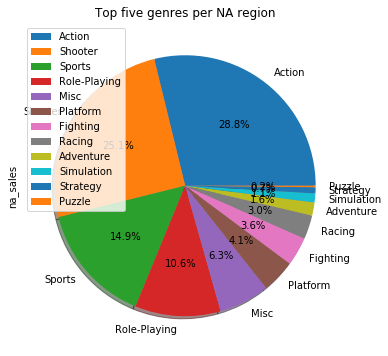

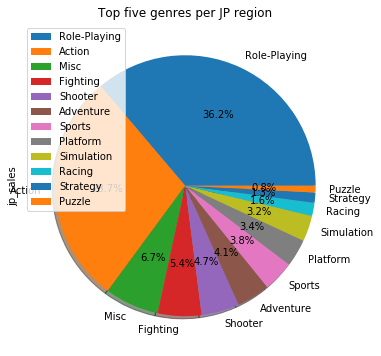

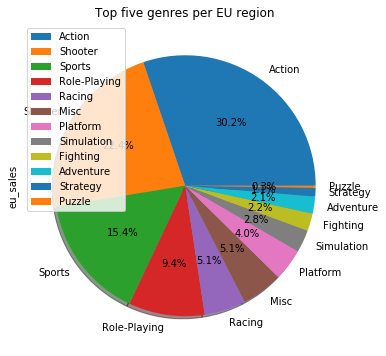

In [150]:
# For each region (NA, EU, JP), determine: The top five genres. 
#Explain the difference.
genres_NA = profile_NA.groupby('genre').sum().sort_values(by='na_sales',ascending=False)
genres_JP = profile_JP.groupby('genre').sum().sort_values(by='jp_sales',ascending=False)
genres_EU = profile_EU.groupby('genre').sum().sort_values(by='eu_sales',ascending=False)

genres_NA.plot(kind='pie',y='na_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')
#genres_NA.plot(kind='bar',stacked=True, figsize=(8,6))
plt.title('Top five genres per NA region')
genres_JP.plot(kind='pie',y='jp_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')
#genres_JP.plot(kind='bar',stacked=True, figsize=(8,6))
plt.title('Top five genres per JP region')
genres_EU.plot(kind='pie',y='eu_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')
#genres_EU.plot(kind='bar',stacked=True, figsize=(8,6))
plt.title('Top five genres per EU region')

### Conclusion:

The top 5 genres for NA are action,shooter,sports, misc, role-playing.The top 5 genres for JP are role-playing, action, misc, fighting, shoooter and the top 5 genres for EU are action, shooter, sports,role-playing, racing.

### Examine whether ratings affect sales in each region

Text(0.5, 1.0, 'Ratings per EU region')

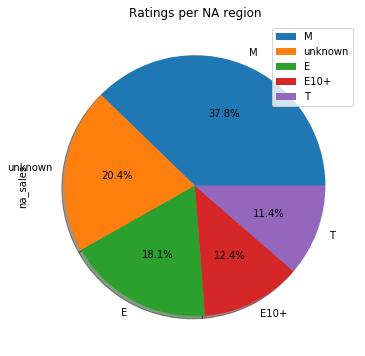

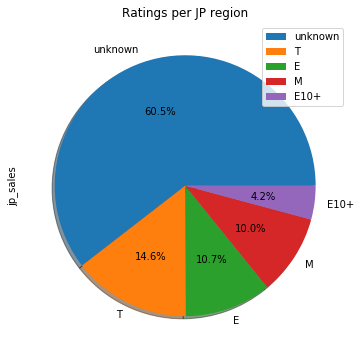

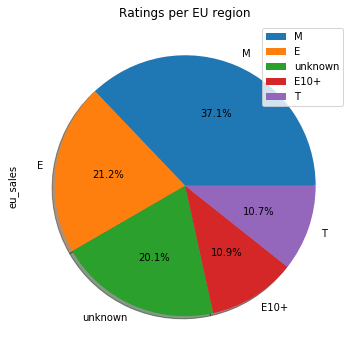

In [151]:
# For each region,Do ESRB ratings affect sales in individual regions?
ratings_NA = profile_NA.groupby('rating').sum().sort_values(by='na_sales',ascending=False)
ratings_JP = profile_JP.groupby('rating').sum().sort_values(by='jp_sales',ascending=False)
ratings_EU = profile_EU.groupby('rating').sum().sort_values(by='eu_sales',ascending=False)

ratings_NA.plot(kind='pie',y='na_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')
plt.title('Ratings per NA region')
ratings_JP.plot(kind='pie',y='jp_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')
plt.title('Ratings per JP region')
ratings_EU.plot(kind='pie',y='eu_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')
plt.title('Ratings per EU region')


### Conclusion:


Looking at the ratings of the regions, we can conclude that ESRB rating does affect sales in each individual regions. For NA region,M,unknown and E10+ ratings got the highest sales. For JP,51.8% of rating is unknown. For EU region,M,E and unknown got the highest.

### Step 5. Test the following hypotheses:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.
- Set the alpha threshold value yourself.
Explain:
- How you formulated the null and alternative hypotheses
-What significance level you chose to test the hypotheses, and why

In [152]:
# Test hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

xboxOne = data[data['platform'] == 'XOne']
pc = data[data['platform'] == 'PC']

# calculate average
xboxOne_user_rating = xboxOne['user_score'].mean().round(decimals=2)
pc_user_rating = pc['user_score'].mean().round(decimals=2)

# drop null values
xboxOne = xboxOne[xboxOne['user_score'].notna()]
pc = pc[pc['user_score'].notna()]


print('The average user rating of XBox One is: ' + str(xboxOne_user_rating))
print('The average user rating of PC is: ' + str(pc_user_rating))

# perform a t-test
results = st.ttest_ind(xboxOne['user_score'], pc['user_score'], equal_var=False)
p_value = results.pvalue


# critical statistical significance level
alpha = 0.05

print('p-value: ', results.pvalue)

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

The average user rating of XBox One is: 6.52
The average user rating of PC is: 6.29
p-value:  0.17572248597802625
We can not reject the null hypothesis


### Conclusion:
We tested the hypothesis that the average user rating of the Xbox One and PS platforms are the same. We started with the null hypothesis H₀ which is the average average user rating of the Xbox One and PS platforms are the same. The alternative hypothesis, H₁ is the average user rating of the Xbox One and PS platforms are not same. For this, we will use an alpha of 0.05, which means that only in 5% of cases will we reject the null hypothesis when it is true.

We used a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.

This result implies that the average average user rating of the Xbox One and PS platforms are same.




In [153]:
### Average user ratings for the Action and Sports genres are different

action = data[data['genre'] == 'Action']
sport = data[data['genre'] == 'Sports']

action = action[action['user_score'].notna()]
sport = sport[sport['user_score'].notna()]

# calculate average
action_user_rating = action['user_score'].mean().round(decimals=2)
sport_user_rating = sport['user_score'].mean().round(decimals=2)

print('The average user rating for action genres is: ' + str(xboxOne_user_rating))
print('The average user rating for sports genres is: ' + str(pc_user_rating))

# perform a t-test
results = st.ttest_ind(action['user_score'], sport['user_score'], equal_var=False)
p_value = results.pvalue
alpha = 0.05

print('p-value: ', results.pvalue)

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')




The average user rating for action genres is: 6.52
The average user rating for sports genres is: 6.29
p-value:  6.545648554821845e-19
We reject the null hypothesis



### Conclusion:
We tested the hypothesis that the average user rating of the Action genre and Sport genres are different. We started with the null hypothesis H₀ which is the the average user rating of the Action genre and Sport genres are different. The alternative hypothesis, H₁ is the average user rating of the Xbox One and PS platforms are  same. For this, we will use an alpha of 0.05, which means that only in 5% of cases will we reject the null hypothesis when it is true.
This result implies that the average user rating of the Action genre and Sport genres are same.



### Step 6. Write a general conclusion


So, we completed an integrated project of an online game store where we evaluated historical data on game sales to identify patterns that determine whether a game succeeds or not.
To do that first we analyzed the data to check for any discrepancies. We corrected data columns, changed data types as well. We also identified missing values in columns like critic_score, rating, user_score, and year_of_release. Backfilling these columns based on any assumption didn't make sense to us, so we keep them as it is. After analyzing we found out that video games started to grow in the year 1995 and peaked up in the year 2010. Out of all platforms available, X360, PS2, PS3, Wii, PS, and DS are the most popular ones and have leading sales. We also found out the lifespan of any game is about 8 years.
Based on the above analysis, we also revealed that critic_score and user_score affected sales of the games. The higher thees scores are, the higher are the sales for those games.
The most profitable genre are action, sports, shooter, and role-playing. Genres with higher sales are action, sports, shooter, role-playing whereas strategy, puzzle, adventure, and flighting are much lower selling genres.
Furthermore, we also analyzed market shares from region to region. Based on that top 5 platforms for the NA region are PS4, XOne, X360, PS3, 3DS. The top 5 Platforms for the JP region are D3DS,PS3,PSV,PS4, WiiU. The top 5 Platforms for the EU region are PS4,PS3,XOne,X360, 3DS.
Likewise,the top 5 genres for NA are action,shooter,sports, misc, role-playing. The top 5 genres for JP are role-playing, action, misc, fighting, shoooter and the top 5 genres for EU are action, shooter,sports,role-playing, racing.
Looking at the ratings of the regions, we can conclude that ESRB rating does affect sales in each individual region.For NA,  M and 'unknown' ratings got the highest sales. For JP,51.8% of rating is unknown. For EU,M,E,unknown, M, E and 'unknown' got the highest. 
We also performed hypothesis testing to determine whether the average user ratings of the Xbox One and PC platforms are different. We also tested if the average user rating for the Action and Sports genre is different or not. Our hypothesis result confirmed This result implies that the average average user rating of the Xbox One and PS platforms are same and the average user rating of the Action genre and Sport genres are same.



